In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import scale

In [2]:
data = pd.read_csv('Training set.csv')

In [3]:
print(data.head(10))

   Height  Weight     Sex
0  165.65   35.41  Female
1  148.53   74.45  Female
2  167.04   81.22    Male
3  161.54   71.47    Male
4  174.31   78.18    Male
5  143.05   79.27  Female
6  149.16   63.71  Female
7  155.80   86.01  Female
8  145.37   88.33  Female
9  162.56   87.36    Male


In [4]:
print(data.info)

<bound method DataFrame.info of       Height  Weight     Sex
0     165.65   35.41  Female
1     148.53   74.45  Female
2     167.04   81.22    Male
3     161.54   71.47    Male
4     174.31   78.18    Male
...      ...     ...     ...
2995  150.83   49.66  Female
2996  157.09   64.34  Female
2997  162.99   45.58  Female
2998  154.76   48.92  Female
2999  185.08   82.74    Male

[3000 rows x 3 columns]>


In [5]:
print(data.describe())

            Height       Weight
count  3000.000000  3000.000000
mean    161.350427    68.400610
std      54.912719    17.041528
min      25.680000     8.530000
25%     149.502500    57.937500
50%     160.870000    67.370000
75%     171.632500    77.952500
max    3050.000000   485.000000


In [6]:
# Checking Null values for training set
data.isnull().sum()*100/data.shape[0]

Height    0.0
Weight    0.0
Sex       0.0
dtype: float64

In [7]:
data.shape

(3000, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

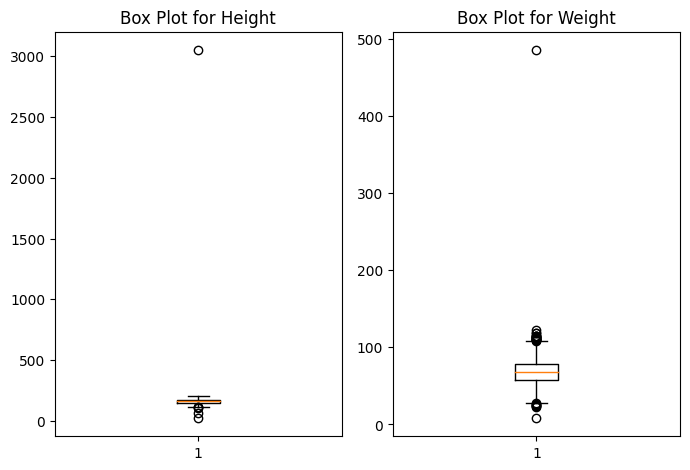

In [8]:
fig = plt.figure(figsize=(7,9))
ax1 = fig.add_subplot(2,2,1)
ax1.boxplot(data['Height'])
ax1.set_title('Box Plot for Height')

ax2 = fig.add_subplot(2,2,2)
ax2.boxplot(data['Weight'])
ax2.set_title('Box Plot for Weight')
plt.tight_layout()
plt.show

In [9]:
#remove outliers from data training
#Q1 is the 25% and Q3 is 75% of data, Q2 is 50% of data

Q1 = data.Height.quantile(0.25)
Q3 = data.Height.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.Height >= Q1 - 1.5*IQR) & (data.Height <= Q3 + 1.5*IQR)] # drop rows that include outliers

In [10]:
#remove outliers from data training
#Q1 is the 25% and Q3 is 75% of data, Q2 is 50% of data

Q1 = data.Weight.quantile(0.25)
Q3 = data.Weight.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.Weight >= Q1 - 1.5*IQR) & (data.Weight <= Q3 + 1.5*IQR)] # drop rows that include outliers

In [11]:
print(data.describe())

            Height       Weight
count  2966.000000  2966.000000
mean    160.431740    68.106500
std      14.862583    14.704601
min     117.230000    28.410000
25%     149.472500    57.950000
50%     160.840000    67.270000
75%     171.597500    77.577500
max     201.680000   107.860000


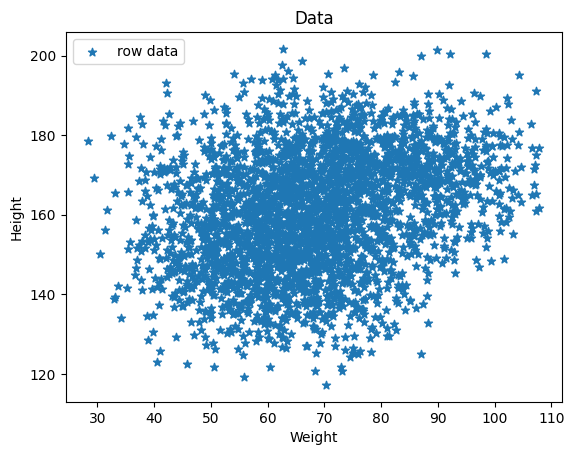

In [12]:
#scatter row data
plt.scatter(data['Weight'],data['Height'],label='row data',marker='*')
plt.title('Data')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.show()

In [13]:
x=np.array(data[['Weight','Height']].values)

In [14]:
x = scale(x)

In [15]:
print(x.shape)

(2966, 2)


In [16]:
Sum_Square_Error = [] # for store cost or error value in list for choosing best value of K 

In [17]:
for k in range(1,5): 
    model = KMeans(n_clusters=k,n_init= 'auto',init='k-means++')
    model.fit(x)
    Sum_Square_Error.append(model.inertia_)

In [18]:
print(Sum_Square_Error)

[5932.0, 3297.9681096451704, 2323.8208453609586, 1835.9001511075626]


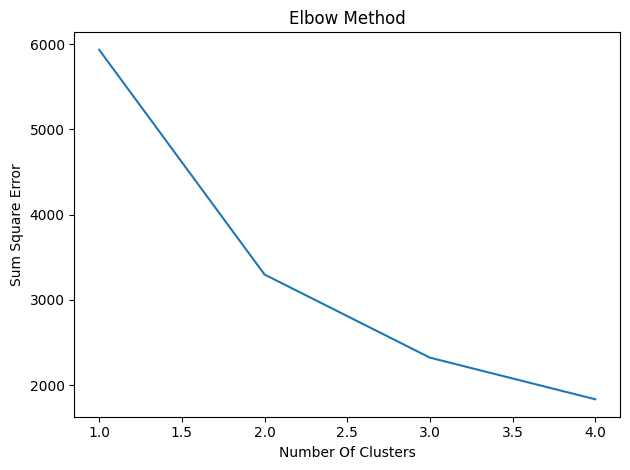

In [19]:
plt.plot(range(1,(len(Sum_Square_Error)+1)) ,Sum_Square_Error )
plt.title('Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('Sum Square Error')
plt.tight_layout()
plt.show()

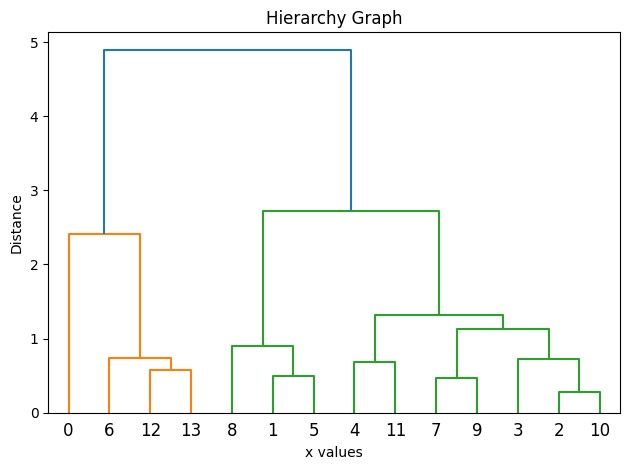

In [20]:
hc = sch.dendrogram(sch.linkage(x[:14,:],method='ward'))
plt.title('Hierarchy Graph')
plt.xlabel('x values')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [21]:
Model = KMeans(n_clusters=2,n_init='auto',init='k-means++')
Model.fit(x)
ypred = Model.predict(x)

centers = Model.cluster_centers_
error = Model.inertia_
lables = set(Model.labels_)

print('Centers : ',centers)
print('Cost : ',error)
print('Labels : ',lables)

Centers :  [[-0.58496815 -0.62105778]
 [ 0.71369617  0.75772768]]
Cost :  3297.9409537383613
Labels :  {0, 1}


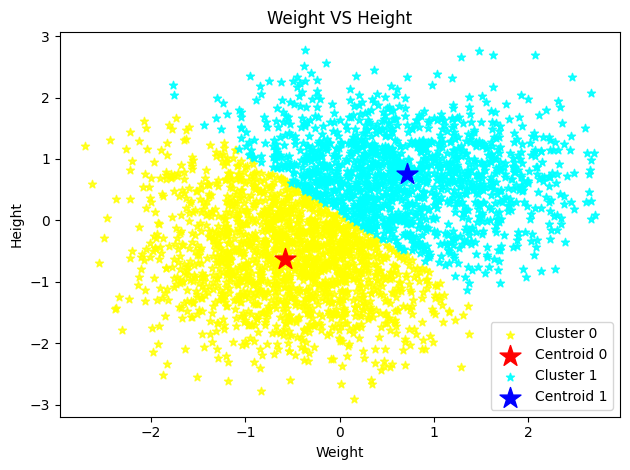

In [22]:

plt.scatter(x[ypred==0,0],x[ypred==0,1], color='yellow',alpha=0.8,label='Cluster 0',marker='*')
plt.scatter(centers[0,0],centers[0,1],color='red',s=250,marker='*',label='Centroid 0')

plt.scatter(x[ypred==1,0],x[ypred==1,1], color='cyan',alpha=0.9,label='Cluster 1',marker='*')
plt.scatter(centers[1,0],centers[1,1],color='blue',s=250,marker='*',label='Centroid 1')

   
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight VS Height')
plt.legend()
plt.tight_layout()
plt.show()